# Green AI project : Water polution

## Importations

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Adding the dataset

In [89]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

In [90]:
train.head()

,Unnamed: 0,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,6,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


### Adding the test set and the targets

In [91]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution']
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns= ['period'])
df.head()

,code,year,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,CAS_7723-14-0,2009,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,CAS_7723-14-0,2009,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,CAS_14265-44-2,2009,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,CAS_7723-14-0,2009,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,CAS_7723-14-0,2009,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


## Data cleaning

In [92]:
print("DataFrame shape : ",train.shape)

DataFrame shape :  (2318, 18)


In [93]:
print("Column name dictionnary : ")
column_names_dict = {column: index for index, column in enumerate(train.columns)}
print(column_names_dict)

Column name dictionnary : 
{'Unnamed: 0': 0, 'code': 1, 'year': 2, 'period': 3, 'id': 4, 'Country': 5, 'tourists': 6, 'venue': 7, 'rate': 8, 'food': 9, 'glass': 10, 'metal': 11, 'other': 12, 'paper': 13, 'plastic': 14, 'leather': 15, 'green_waste': 16, 'waste_recycling': 17}


### Searching for missing values

In [94]:
def cheking_for_missing_values() : 
    missing_values = train.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0          0
code                0
year                0
period              0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
dtype: int64


In [95]:
train = train.dropna()
cheking_for_missing_values()


Total missing values in each column:
Unnamed: 0         0
code               0
year               0
period             0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
dtype: int64


### Drop any duplicate

In [96]:
train.drop_duplicates(inplace=True)

In [97]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])
df_numbers = df_numbers.drop(columns = ['tourists'])
df_numbers = df_numbers.drop(columns = ['year'])
df_numbers.head()


,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


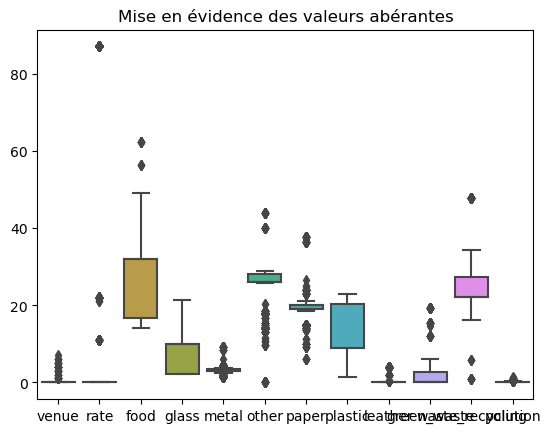

<Figure size 1200x200 with 0 Axes>

In [98]:
sns.boxplot(data = df_numbers)
plt.title('Mise en évidence des valeurs abérantes')
plt.figure(figsize=(12,2))
plt.show()

## Data visualisation

In [99]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])
df_strings = df.select_dtypes(exclude=['float64', 'int64'])
df_strings.head()

,code,id,Country
0,CAS_7723-14-0,ES014MSPFES-014-NR-038-000-02-02,Spain
1,CAS_7723-14-0,FRGR0220,France
2,CAS_14265-44-2,FRGR1496,France
3,CAS_7723-14-0,FRDR174,France
4,CAS_7723-14-0,FRGR1022,France


<Axes: >

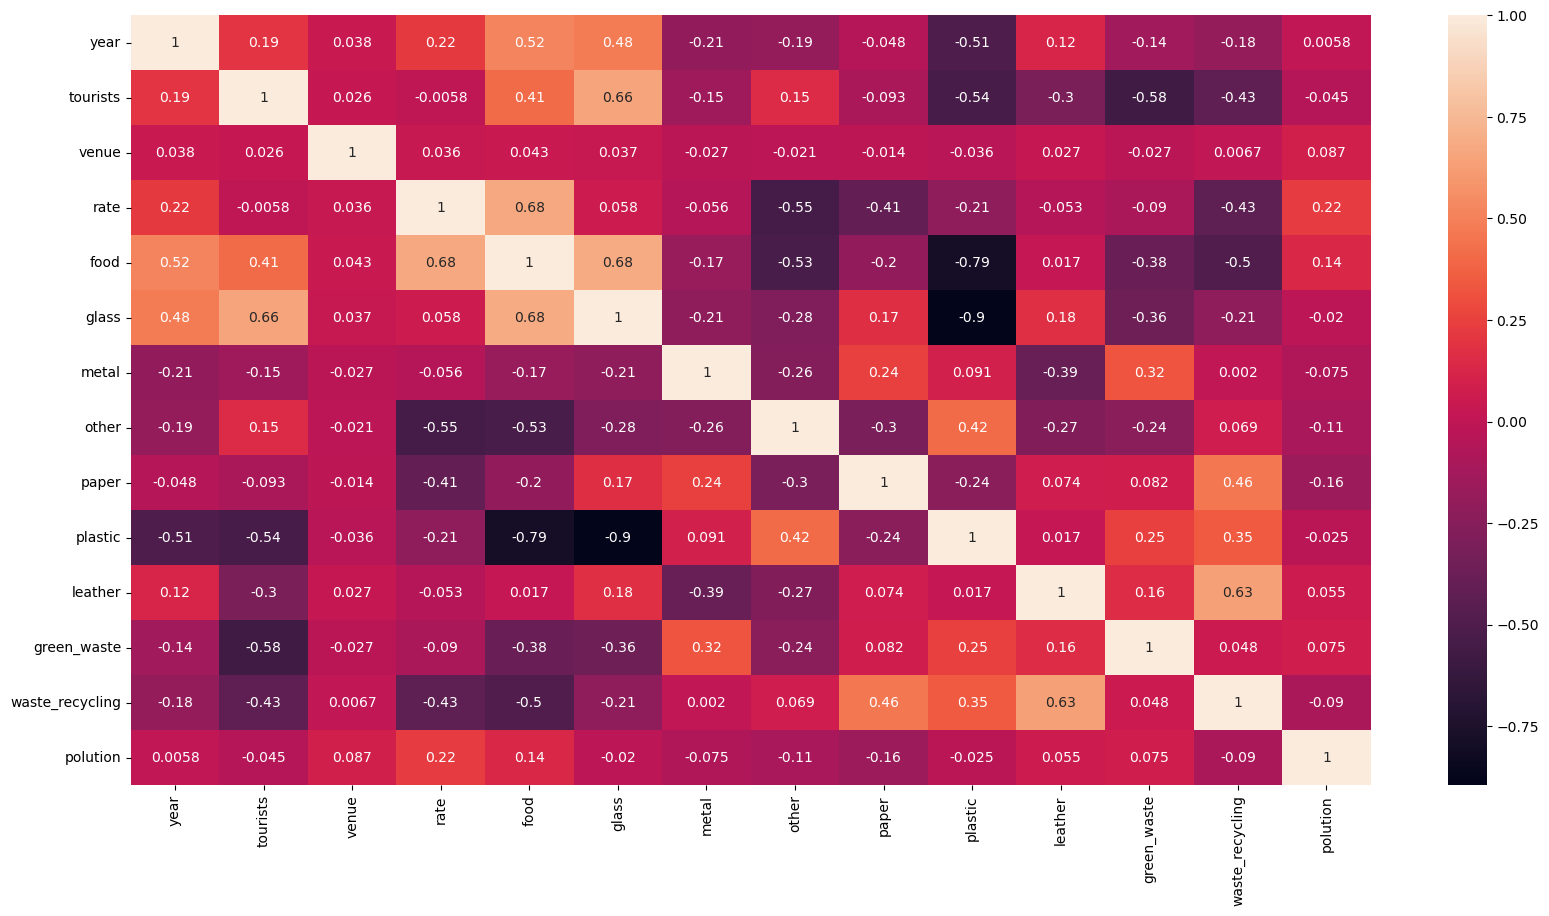

In [100]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_numbers.corr(),annot=True)


Country
France            1156
United Kingdom     642
Spain              236
Germany             92
Bulgaria            48
Finland             47
Sweden              40
Belgium             29
Austria             28
Lithuania           27
Italy               23
Serbia              15
Latvia               9
Czech Republic       8
Romania              4
Ireland              3
Switzerland          3
Portugal             3
Luxembourg           3
Croatia              3
Netherlands          2
Norway               1
Name: count, dtype: int64


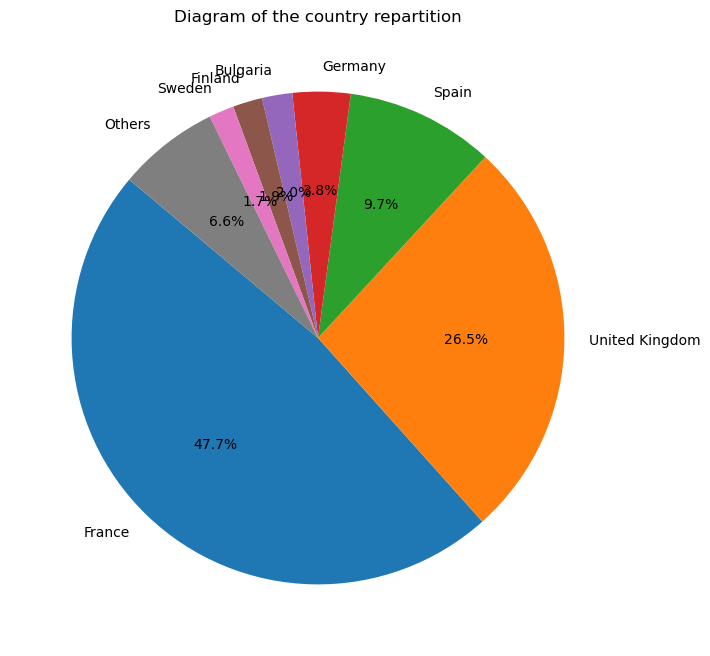

In [101]:
count_country = df_strings['Country'].value_counts()

print(count_country)

limit = 40
count_country['Others'] = count_country[count_country < limit].sum()
count_country = count_country[count_country >= limit]

plt.figure(figsize=(8, 8))
plt.pie(count_country, labels=count_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagram of the country repartition') 
plt.show()

### Visualisation of the mean pollution for each country with indicated the number of values per country 

C:\Users\cassi\AppData\Local\Temp\ipykernel_20224\2729216873.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, len(count_country)))


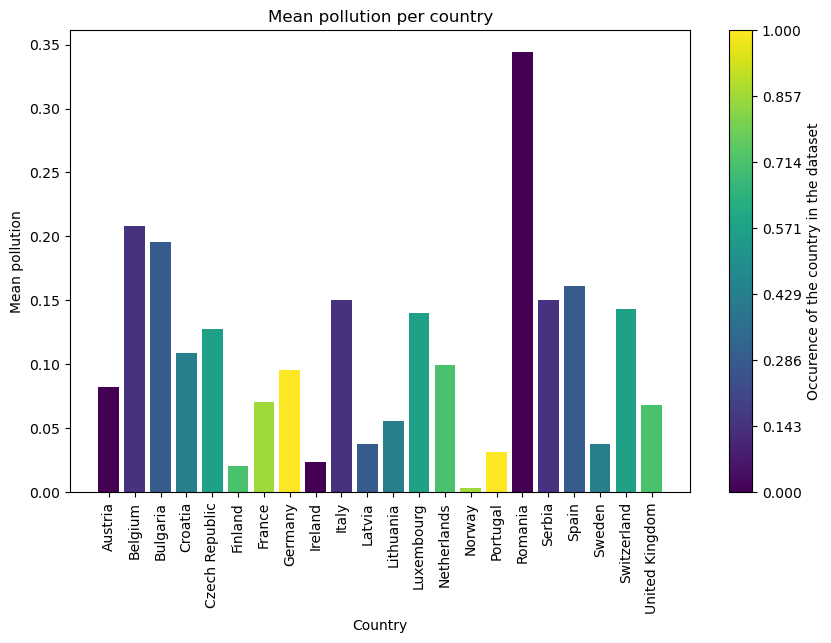

In [102]:
from matplotlib.cm import ScalarMappable

average_pollution = df.groupby('Country')['polution'].mean()

colors = plt.cm.viridis(np.linspace(0, 1, len(count_country)))

plt.figure(figsize=(10, 6))
plt.bar(average_pollution.index, average_pollution, color=colors)
plt.title('Mean pollution per country')
plt.xlabel('Country')
plt.ylabel('Mean pollution')
plt.xticks(rotation='vertical')

sm = ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])  
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, len(count_country)))
cbar.set_label('Occurence of the country in the dataset')

plt.show()

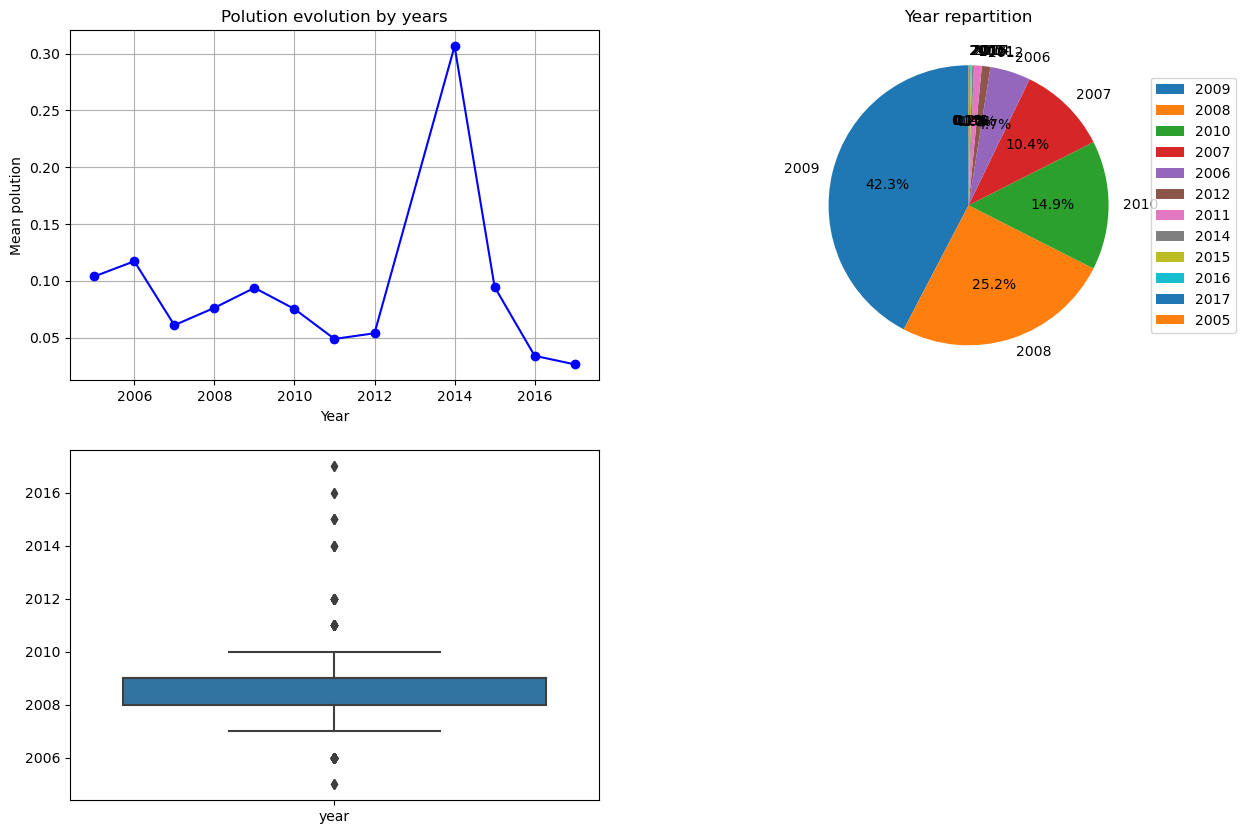

In [103]:
average_pollution_by_year = df.groupby('year')['polution'].mean()

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(average_pollution_by_year.index, average_pollution_by_year, marker='o', linestyle='-', color='b')
plt.title('Polution evolution by years')
plt.xlabel('Year')
plt.ylabel('Mean polution')
plt.grid(True)

plt.subplot(2,2,2)
year_counts = df['year'].value_counts()
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Year repartition')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placez la légende à l'extérieur à droite


df_years = df.drop(columns= ['code','id','Country','tourists','venue','rate','food','glass','metal','other','paper','plastic','leather','green_waste','waste_recycling','polution'])
df_years.head()
plt.subplot(2,2,3)
sns.boxplot(data = df_years)
plt.show()

In [104]:
df_numbers.head()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,2009,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84,0.013212
1,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.057482
2,2009,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037835
3,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.055119
4,2009,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.037617


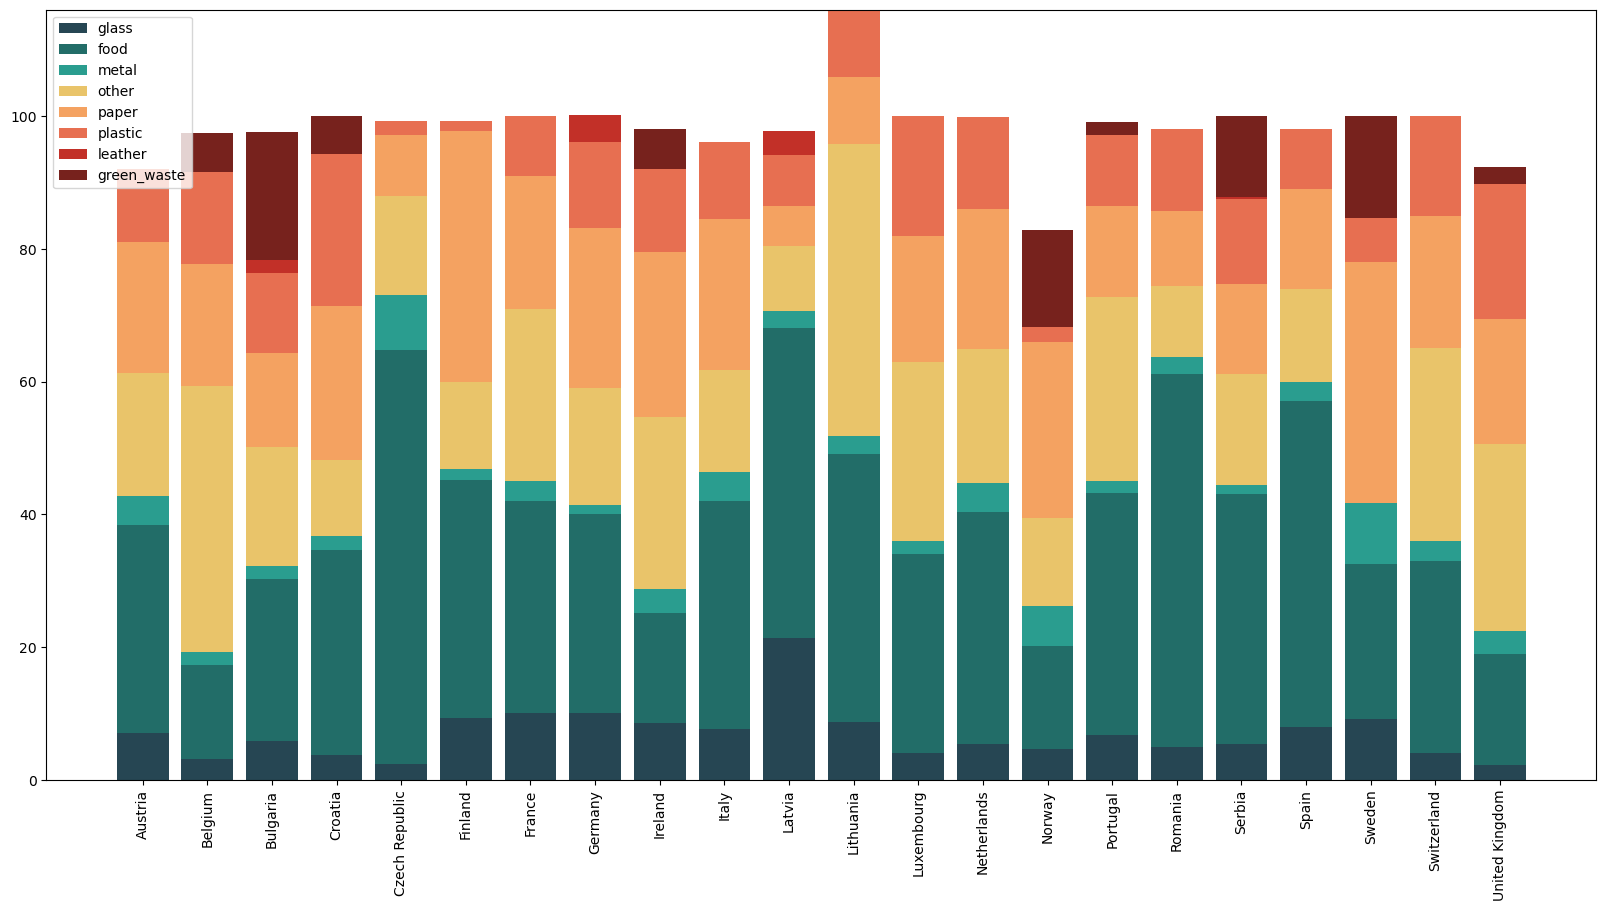

In [105]:
plt.figure(figsize=(20, 10))

categories = ['glass','food','metal','other','paper','plastic','leather','green_waste']
color = ['#264653','#226D68','#2A9D8F','#E9C46A','#F4A261','#E76F51','#C23028','#77221D']

average_glass_by_country = df.groupby('Country')['glass'].mean()

bars = plt.bar(average_glass_by_country.index, average_glass_by_country, color=color[0])

bottom = average_glass_by_country

for i in range(1,len(categories)) : 
    average = df.groupby('Country')[categories[i]].mean()
    bars = plt.bar(average.index, average, bottom= bottom, color = color[i])
    bottom = bottom + average
    
plt.legend(categories, loc='upper left')

plt.xticks(rotation='vertical')
plt.show()

## Standardisation
### Encode the string values

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['id'] = le.fit_transform(df['id'])
df['Country'] = le.fit_transform(df['Country'])
df['code'] = le.fit_transform(df['code'])

target = df['polution']
df = df.drop(columns= ['polution'])

df.head()

,code,year,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,1,2009,160,18,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,1,2009,852,6,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,0,2009,977,6,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,1,2009,501,6,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,1,2009,969,6,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


### Fiting the values

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

In [109]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_standardized,target,train_size = 0.75)

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

### Linear regression

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [121]:
ML_pipeline = make_pipeline(PCA(n_components=2),LinearRegression())

In [122]:
ML_pipeline.fit(x_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])